In [20]:
import os



In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

def read_data(file_path):

    column_names = ['user-id',
                    'activity',
                    'timestamp',
                    'x-axis',
                    'y-axis',
                    'z-axis']
    df = pd.read_csv(file_path,
                     header=None,
                     names=column_names)
    # Last column has a ";" character which must be removed ...
    df['z-axis'].replace(regex=True,
      inplace=True,
      to_replace=r';',
      value=r'')
    # ... and then this column must be transformed to float explicitly
    df['z-axis'] = df['z-axis'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df.dropna(axis=0, how='any', inplace=True)

    return df


def convert_to_float(x):

    try:
        return np.float(x)
    except:
        return np.nan
    
def convert_to_float(x):

    try:
        return np.float(x)
    except:
        return np.nan
 

 
def show_basic_dataframe_info(dataframe):

    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

# Load data set containing all the data from csv
dataset = read_data('Outputs/WISDM_ar_v1.1_raw.txt')
dataset.head()

,user-id,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [40]:
new_test_data = pd.read_csv("Outputs/output_file_acc.csv")
new_test_data = new_test_data[["Profile","Activity","ts","X","Y","Z"]]
new_df = new_test_data.rename(columns={"Profile": "user", "Activity": "activity","ts":"timestamp","X":"x-axis","Y":"y-axis",
                              "Z":"z-axis"})
#new_df.Activity_code = pd.Categorical(new_df.Activity_code)
#new_df['Activity_code'] = new_df.Activity_code.cat.codes
new_df['activity'].unique()
#0 Downstairs
#1 Laying
#2 Sitting
#3 standing
#4 Upstairs
#5 Walking

#===user
#37 AR
#38 DL
#39 GN
#40 JD
#41 MC
#42 MG
#43 RS
#44 UM

actdict = {"stand":"Standing",
            "sit":"Sitting",
            "stairsu":"Upstairs",
            "stairsd":"Downstairs",
            "walk":"Walking",
            "laying":"Laying"
           }

Act_text = ["stand","sit", "laying", "walk", "stairsu", "stairsd"]
for act in Act_text:
    new_df.loc[new_df['activity'] == act, 'activity'] = actdict[act]
new_df.user = pd.Categorical(new_df.user)
new_df['user-id'] = new_df.user.cat.codes 
new_df = new_df.drop("user", axis=1)
new_df['user-id'] = new_df['user-id']+37
new_df.head()
#new_df.loc[new_df['user-id'] ==45]

,activity,timestamp,x-axis,y-axis,z-axis,user-id
0,Standing,1578568648,0.190048,-0.078262,-0.986176,42
1,Standing,1578568648,0.140366,-0.068359,-0.998215,42
2,Standing,1578568648,0.003952,-0.032806,-0.969467,42
3,Standing,1578568648,-0.010345,0.084564,-0.947189,42
4,Standing,1578568648,0.116348,-0.303986,-1.067520,42


In [43]:
dataset = pd.concat([dataset, new_df])

dataset["user-id"].unique()
dataset.head()

C:\Users\mghan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,activity,timestamp,user-id,x-axis,y-axis,z-axis
0,Jogging,49105962326000,33,-0.694638,12.680544,0.503953
1,Jogging,49106062271000,33,5.012288,11.264028,0.953424
2,Jogging,49106112167000,33,4.903325,10.882658,-0.081722
3,Jogging,49106222305000,33,-0.612916,18.496431,3.023717
4,Jogging,49106332290000,33,-1.184970,12.108489,7.205164


In [44]:
def feature_normalize(dataset):
    mu = np.mean(dataset,axis = 0)
    sigma = np.std(dataset,axis = 0)
    return (dataset - mu)/sigma
    
def plot_axis(ax, x, y, title):
    ax.plot(x, y)
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)
    
def plot_activity(activity,data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows = 3, figsize = (15, 10), sharex = True)
    plot_axis(ax0, data['timestamp'], data['x-axis'], 'x-axis')
    plot_axis(ax1, data['timestamp'], data['y-axis'], 'y-axis')
    plot_axis(ax2, data['timestamp'], data['z-axis'], 'z-axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

In [45]:
#dataset = read_data("Outputs/WISDM_ar_v1.1_raw.txt")
dataset.dropna(axis=0, how='any', inplace= True)
dataset['x-axis'] = feature_normalize(dataset['x-axis'])
dataset['y-axis'] = feature_normalize(dataset['y-axis'])
dataset['z-axis'] = feature_normalize(dataset['z-axis'])

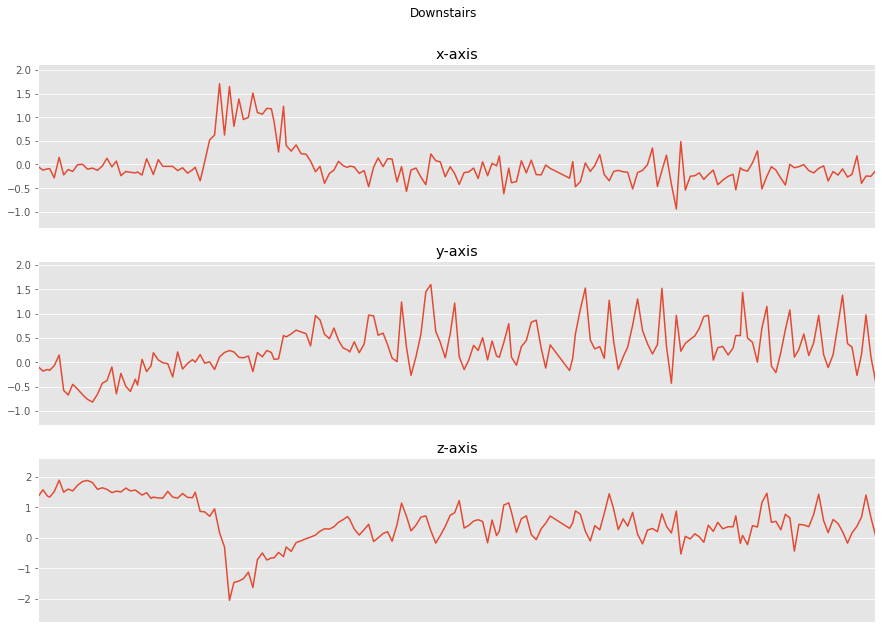

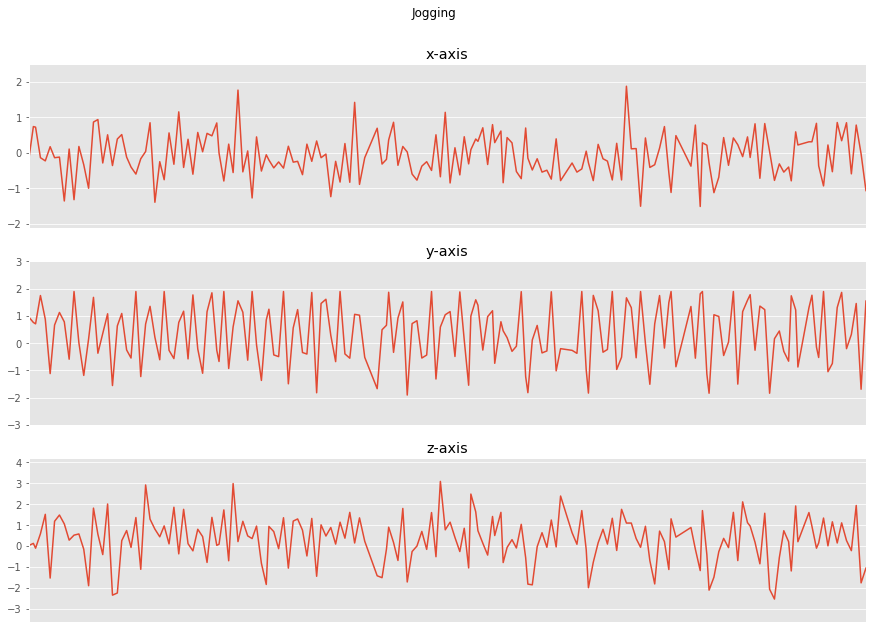

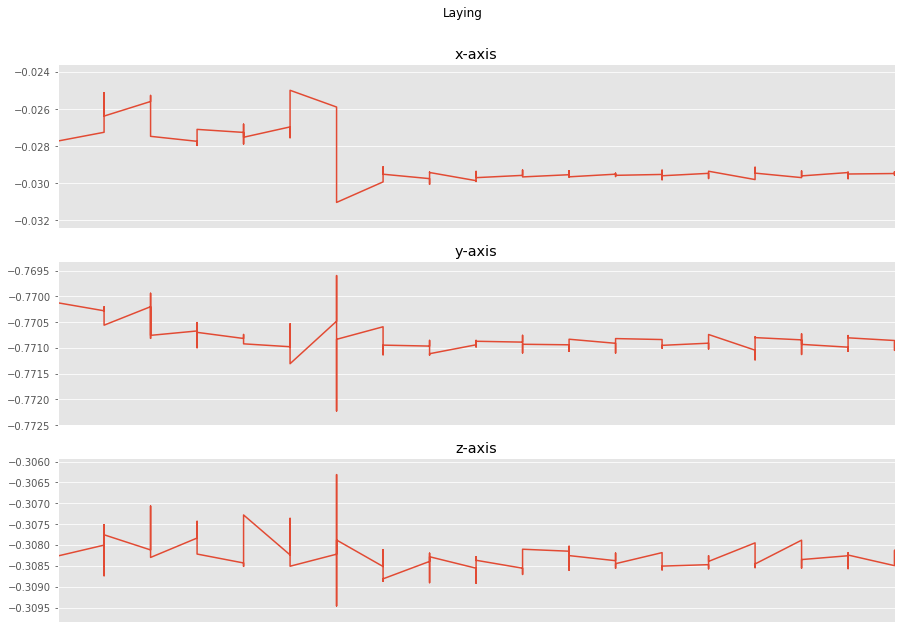

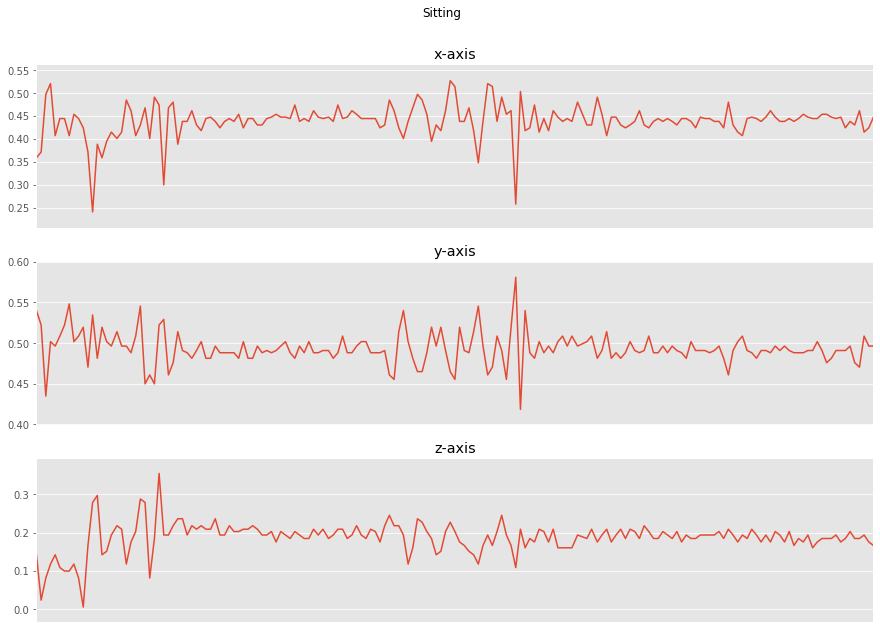

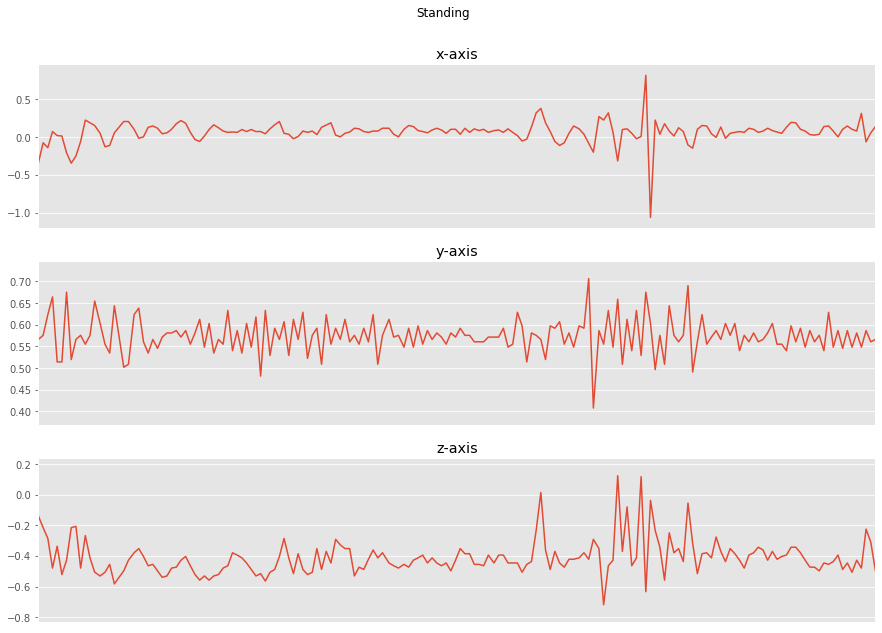

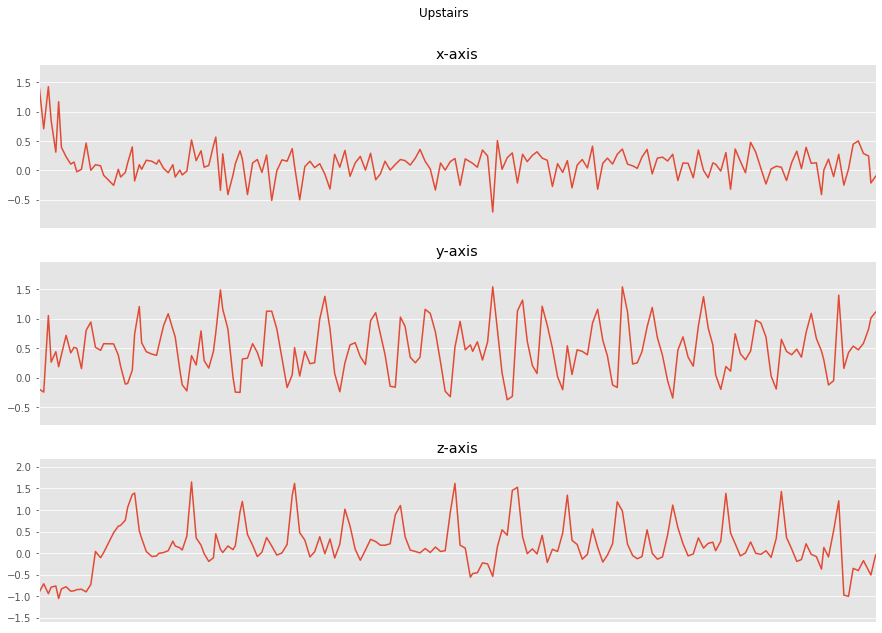

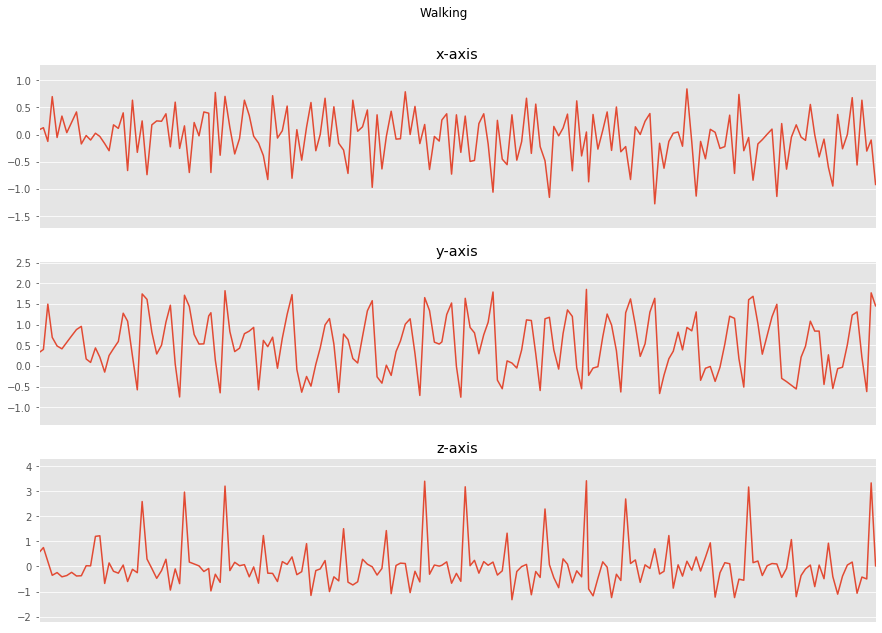

In [46]:
for activity in np.unique(dataset["activity"]):
    subset = dataset[dataset["activity"] == activity][:180]
    plot_activity(activity,subset)

In [47]:
#coding the text data for activity into codes
dataset.activity = pd.Categorical(dataset.activity)
dataset['Activity_code'] = dataset.activity.cat.codes

In [48]:
# the labels for the activity
#0 Downstairs
#1 Jogging
#2 Sitting
#3 Standing
#4 Upstairs
#5 Walking

#dataset.loc[dataset['Activity_code'] ==5]

In [49]:
# Differentiate between test set and training set
df_test = dataset[dataset['user-id'] > 28]
df_train = dataset[dataset['user-id'] <= 28]

In [50]:
# Normalize features for training data set (values between 0 and 1)
# Surpress warning for next 3 operation
pd.options.mode.chained_assignment = None  # default='warn'
df_train['x-axis'] = df_train['x-axis'] / df_train['x-axis'].max()
df_train['y-axis'] = df_train['y-axis'] / df_train['y-axis'].max()
df_train['z-axis'] = df_train['z-axis'] / df_train['z-axis'].max()
# Round numbers
df_train = df_train.round({'x-axis': 4, 'y-axis': 4, 'z-axis': 4})

In [51]:
LABEL = 'Activity_code'
# Same labels will be reused throughout the program
LABELS = ['Downstairs',
          'Jogging',
          'Sitting',
          'Standing',
          'Upstairs',
          'Walking',
          'Laying']
TIME_PERIODS = 80
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 40

In [52]:
def create_segments_and_labels(df, time_steps, step, label_name):

    # x, y, z acceleration as features
    N_FEATURES = 3
    # Number of steps to advance in each iteration (for me, it should always
    # be equal to the time_steps in order to have no overlap between segments)
    # step = time_steps
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
        xs = df['x-axis'].values[i: i + time_steps]
        ys = df['y-axis'].values[i: i + time_steps]
        zs = df['z-axis'].values[i: i + time_steps]
        # Retrieve the most often used label in this segment
        label = stats.mode(df[label_name][i: i + time_steps])[0][0]
        segments.append([xs, ys, zs])
        labels.append(label)

    # Bring the segments into a better shape
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    labels = np.asarray(labels)

    return reshaped_segments, labels

x_train, y_train = create_segments_and_labels(df_train,
                                              TIME_PERIODS,
                                              STEP_DISTANCE,
                                              LABEL)

In [53]:
print('x_train shape: ', x_train.shape)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)

x_train shape:  (20868, 80, 3)
20868 training samples
y_train shape:  (20868,)


In [54]:
class_activity = dataset['activity'].unique()
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
num_classes = class_activity.size
num_classes

7

In [55]:
input_shape = (num_time_periods*num_sensors)
x_train = x_train.reshape(x_train.shape[0], input_shape)
print('x_train shape:', x_train.shape)
print('input_shape:', input_shape)

x_train shape: (20868, 240)
input_shape: 240


In [56]:
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')

In [57]:
#one-hot-encoding of our labels
y_train_hot = to_categorical(y_train,num_classes)
y_train[:10]
print('New y_train shape: ', y_train_hot.shape)

New y_train shape:  (20868, 7)


In [58]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
model_m = Sequential()
# Remark: since coreml cannot accept vector shapes of complex shape like
# [80,3] this workaround is used in order to reshape the vector internally
# prior feeding it into the network
model_m.add(Reshape((TIME_PERIODS, 3), input_shape=(input_shape,)))
model_m.add(Dense(100, activation='relu'))
model_m.add(Dense(100, activation='relu'))
model_m.add(Dense(100, activation='relu'))
model_m.add(Flatten())
model_m.add(Dense(num_classes, activation='softmax'))
print(model_m.summary())

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 80, 3)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 80, 100)           400       
_________________________________________________________________
dense_2 (Dense)              (None, 80, 100)           10100     
_________________________________________________________________
dense_3 (Dense)              (None, 80, 100)           10100     
_________________________________________________________________
flatten_1 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 56007     
Total params: 76,607
Trainable params: 76,607
Non-trainable params: 0
_________________________________________________________________
None


In [59]:
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

In [60]:

callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]

model_m.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

# Hyper-parameters
BATCH_SIZE = 400
EPOCHS = 50

# Enable validation to use ModelCheckpoint and EarlyStopping callbacks.
history = model_m.fit(x_train,
                      y_train_hot,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 16694 samples, validate on 4174 samples
Epoch 1/50
16694/16694 [==============================] - 5s 326us/step - loss: 1.0972 - acc: 0.6133 - val_loss: 0.7915 - val_acc: 0.7559
Epoch 2/50
16694/16694 [==============================] - 4s 244us/step - loss: 0.6066 - acc: 0.7891 - val_loss: 0.6364 - val_acc: 0.8081
Epoch 3/50
16694/16694 [==============================] - 4s 261us/step - loss: 0.5176 - acc: 0.8113 - val_loss: 0.6216 - val_acc: 0.8330
Epoch 4/50
16694/16694 [==============================] - 4s 267us/step - loss: 0.4845 - acc: 0.8231 - val_loss: 0.6478 - val_acc: 0.8124
Epoch 5/50
16694/16694 [==============================] - 4s 225us/step - loss: 0.4665 - acc: 0.8283 - val_loss: 0.6943 - val_acc: 0.7724
Epoch 6/50
16694/16694 [==============================] - 4s 233us/step - loss: 0.4371 - acc: 0.8386 - val_loss: 0.7220 - val_acc: 0.7331
Epoch 7/50
16694/16694 [==

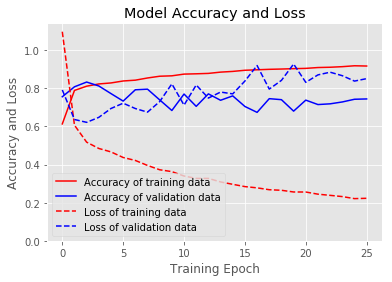

              precision    recall  f1-score   support

         0.0       0.69      0.57      0.62      1864
         1.0       0.97      0.98      0.97      6567
         3.0       1.00      0.99      0.99      1050
         4.0       0.98      1.00      0.99       833
         5.0       0.68      0.63      0.66      2342
         6.0       0.88      0.93      0.90      8212

   micro avg       0.88      0.88      0.88     20868
   macro avg       0.87      0.85      0.86     20868
weighted avg       0.88      0.88      0.88     20868



In [61]:
from sklearn import metrics
from sklearn.metrics import classification_report
plt.figure(figsize=(6, 4))
plt.plot(history.history['acc'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_acc'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

# Print confusion matrix for training data
y_pred_train = model_m.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
print(classification_report(y_train, max_y_pred_train))

In [62]:
df_test.head()
df_test = df_test[["user-id","Activity_code","timestamp","x-axis","y-axis","z-axis"]]

In [63]:
x_test, y_test = create_segments_and_labels(df_test,
                                              TIME_PERIODS,
                                              STEP_DISTANCE,
                                              LABEL)

In [64]:
print('x_test shape: ', x_test.shape)
print(x_test.shape[0], 'training samples')
print('y_test shape: ', y_test.shape)

x_test shape:  (12008, 80, 3)
12008 training samples
y_test shape:  (12008,)


In [65]:
# Read the testing labels
y_test_df = df_test["Activity_code"]
# One-hot encode the integer labels
y_test = to_categorical(y_test_df)
y_test.shape


(480365, 7)

In [66]:
input_shape = (num_time_periods*num_sensors)
x_test = x_test.reshape(x_test.shape[0], input_shape)
print('x_train shape:', x_test.shape)
print('input_shape:', input_shape)

x_train shape: (12008, 240)
input_shape: 240


In [67]:
print('\nPrediction from Keras:')
test_record = x_test[1].reshape(1,input_shape)
keras_prediction = np.argmax(model_m.predict(test_record), axis=1)


Prediction from Keras:


In [148]:
model_m.fit(x_train,
                      y_train_hot,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)

Train on 16694 samples, validate on 4174 samples
Epoch 1/50
16694/16694 [==============================] - 4s 258us/step - loss: 0.2162 - acc: 0.9202 - val_loss: 0.8786 - val_acc: 0.7336
Epoch 2/50
16694/16694 [==============================] - 4s 236us/step - loss: 0.2090 - acc: 0.9239 - val_loss: 0.8572 - val_acc: 0.7535
Epoch 3/50
16694/16694 [==============================] - 4s 235us/step - loss: 0.2099 - acc: 0.9240 - val_loss: 0.9390 - val_acc: 0.7096
Epoch 4/50
16694/16694 [==============================] - 4s 246us/step - loss: 0.2091 - acc: 0.9224 - val_loss: 0.8477 - val_acc: 0.7496


In [68]:
# Save the model
model_m.save("smartphone_trained_v3.h5")

In [69]:
# Load the model
from tensorflow.keras.models import load_model
model = load_model("smartphone_trained_v3.h5")

In [70]:
# Grab just one data point to test with
test = np.expand_dims(x_test[0], axis=0)
test.shape

(1, 240)

In [71]:
# Make a prediction. The result should be 1 - Jogging
print(f"Predicted class: {model.predict_classes(test)}")

Predicted class: [1]


In [73]:
df_test.head(1)

,user-id,Activity_code,timestamp,x-axis,y-axis,z-axis
0,33,1,49105962326000,-0.153986,0.952363,0.024011


In [122]:

new_test_df = dataset.loc[(dataset['user-id'] ==40) & (dataset['Activity_code']==3)]
#new_test_df = new_test_df.rename(columns={"activity":"Activity_code"})
#new_test_df.Activity_code = pd.Categorical(new_test_df.Activity_code)
#new_test_df['Activity_code'] = new_test_df.Activity_code.cat.codes

new_test_df.head()
ndf_test = new_test_df[["user-id","Activity_code","timestamp","x-axis","y-axis","z-axis"]]
#new_test_df['Activity_code'].unique()
ndf_test.head()

,user-id,Activity_code,timestamp,x-axis,y-axis,z-axis
53726,40,3,1578503051,-0.000891,-0.773512,-0.301121
53727,40,3,1578503051,0.000097,-0.774215,-0.297746
53728,40,3,1578503051,-0.010044,-0.775952,-0.306085
53729,40,3,1578503051,-0.008622,-0.775506,-0.298897
53730,40,3,1578503051,-0.010984,-0.774650,-0.281317


In [123]:
x_test1, y_test1 = create_segments_and_labels(ndf_test,
                                              TIME_PERIODS,
                                              STEP_DISTANCE,
                                              LABEL)

In [124]:
print('x_test shape: ', x_test1.shape)
print(x_test1.shape[0], 'training samples')
print('y_test shape: ', y_test1.shape)

x_test shape:  (91, 80, 3)
91 training samples
y_test shape:  (91,)


In [125]:
# Read the testing labels
y_test1_df = new_test_df["Activity_code"]
# One-hot encode the integer labels
y_test1 = to_categorical(y_test1_df)
y_test1.shape


(3708, 4)

In [126]:
input_shape = (num_time_periods*num_sensors)
x_test1 = x_test1.reshape(x_test1.shape[0], input_shape)
print('x_train shape:', x_test1.shape)
print('input_shape:', input_shape)

x_train shape: (91, 240)
input_shape: 240


In [127]:
# Grab just one data point to test with
test1 = np.expand_dims(x_test1[0], axis=0)
test1.shape

(1, 240)

In [128]:
# Make a prediction. The result should be 3 - STANDING
print(f"Predicted class: {model.predict_classes(test1)}")

Predicted class: [3]


In [130]:
ndf_test.head(1)

,user-id,Activity_code,timestamp,x-axis,y-axis,z-axis
53726,40,3,1578503051,-0.000891,-0.773512,-0.301121
